In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

# global plotting params
plt.rcParams["figure.figsize"] = (7, 4)

# global constants
TARGET = "price_range"

In [5]:
# download and check the values
df = pd.read_csv("data/train.csv")
df.head(10).T

0       1       2       3       4       5       6       7  \
battery_power   842.0  1021.0   563.0   615.0  1821.0  1859.0  1821.0  1954.0   
blue              0.0     1.0     1.0     1.0     1.0     0.0     0.0     0.0   
clock_speed       2.2     0.5     0.5     2.5     1.2     0.5     1.7     0.5   
dual_sim          0.0     1.0     1.0     0.0     0.0     1.0     0.0     1.0   
fc                1.0     0.0     2.0     0.0    13.0     3.0     4.0     0.0   
four_g            0.0     1.0     1.0     0.0     1.0     0.0     1.0     0.0   
int_memory        7.0    53.0    41.0    10.0    44.0    22.0    10.0    24.0   
m_dep             0.6     0.7     0.9     0.8     0.6     0.7     0.8     0.8   
mobile_wt       188.0   136.0   145.0   131.0   141.0   164.0   139.0   187.0   
n_cores           2.0     3.0     5.0     6.0     2.0     1.0     8.0     4.0   
pc                2.0     6.0     6.0     9.0    14.0     7.0    10.0     0.0   
px_height        20.0   905.0  1263.0  1216.0  1208.0  1004.0   381.0   512.0   
px_width        756.0  1988.0  1716.0  1786.0  1212.0  1654.0  1018.0  1149.0   
ram            2549.0  2631.0  2603.0  2769.0  1411.0  1067.0  3220.0   700.0   
sc_h              9.0    17.0    11.0    16.0     8.0    17.0    13.0    16.0   
sc_w              7.0     3.0     2.0     8.0     2.0     1.0     8.0     3.0   
talk_time        19.0     7.0     9.0    11.0    15.0    10.0    18.0     5.0   
three_g           0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
touch_screen      0.0     1.0     1.0     0.0     1.0     0.0     0.0     1.0   
wifi              1.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0   
price_range       1.0     2.0     2.0     2.0     1.0     1.0     3.0     0.0   

                    8       9  
battery_power  1445.0   509.0  
blue              1.0     1.0  
clock_speed       0.5     0.6  
dual_sim          0.0     1.0  
fc                0.0     2.0  
four_g            0.0     1.0  
int_memory       53.0     9.0  
m_dep             0.7     0.1  
mobile_wt       174.0    93.0  
n_cores           7.0     5.0  
pc               14.0    15.0  
px_height       386.0  1137.0  
px_width        836.0  1224.0  
ram            1099.0   513.0  
sc_h             17.0    19.0  
sc_w              1.0    10.0  
talk_time        20.0    12.0  
three_g           1.0     1.0  
touch_screen      0.0     0.0  
wifi              0.0     0.0  
price_range       0.0     0.0

## general metrics

In [8]:
# check the columns' type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# check descriptive metrics
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

## target check

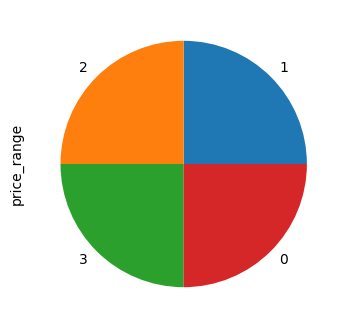

In [35]:
# distribution of the price range
df[TARGET].value_counts().plot.pie();

## feature-by-feature analysis

Conclusion: the dataset is well balanced with equal share of all price ranges.

The next step i would like to categorize all my features into bool and not. After manual check I couldn't detect and categorical features. All the features are either binary or int/float and the distance between them on the numerical axis makes sense to categorise them as numericals.

This will be incapacitated into dictionary that is later ease the preprocessing. 

In [62]:
feat_dict = {}
for feature in df.drop(TARGET, axis=1):
    # bool
    if df[feature].nunique() == 2:
        feat_dict[feature] = bool
    elif df[feature].nunique() > 2:
        feat_dict[feature] = float
    else:
        raise ValueError("something wrong")

feats_bool = [k for k,v in feat_dict.items() if v == bool]
feats_float = [k for k,v in feat_dict.items() if v == float]
print(f"no of bool features: {len(feats_bool)}")
print(f"no of float features: {len(feats_float)}")

# save dict
with open("data/feat_dict.pickle", "wb") as f:
    pickle.dump(feat_dict, f)

no of bool features: 6
no of float features: 14


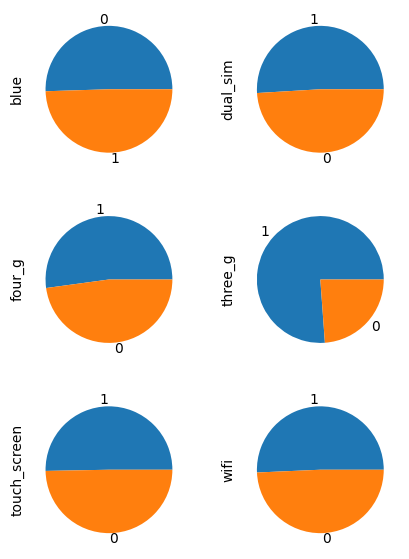

In [46]:
# plot bool features
fig, axes = plt.subplots(3, 2, figsize=(5, 7))
for i, feature in enumerate(feats_bool):
    row = i//2
    col = i%2

    ax = axes[row, col]
    df[feature].value_counts().plot(kind="pie", ax=ax)

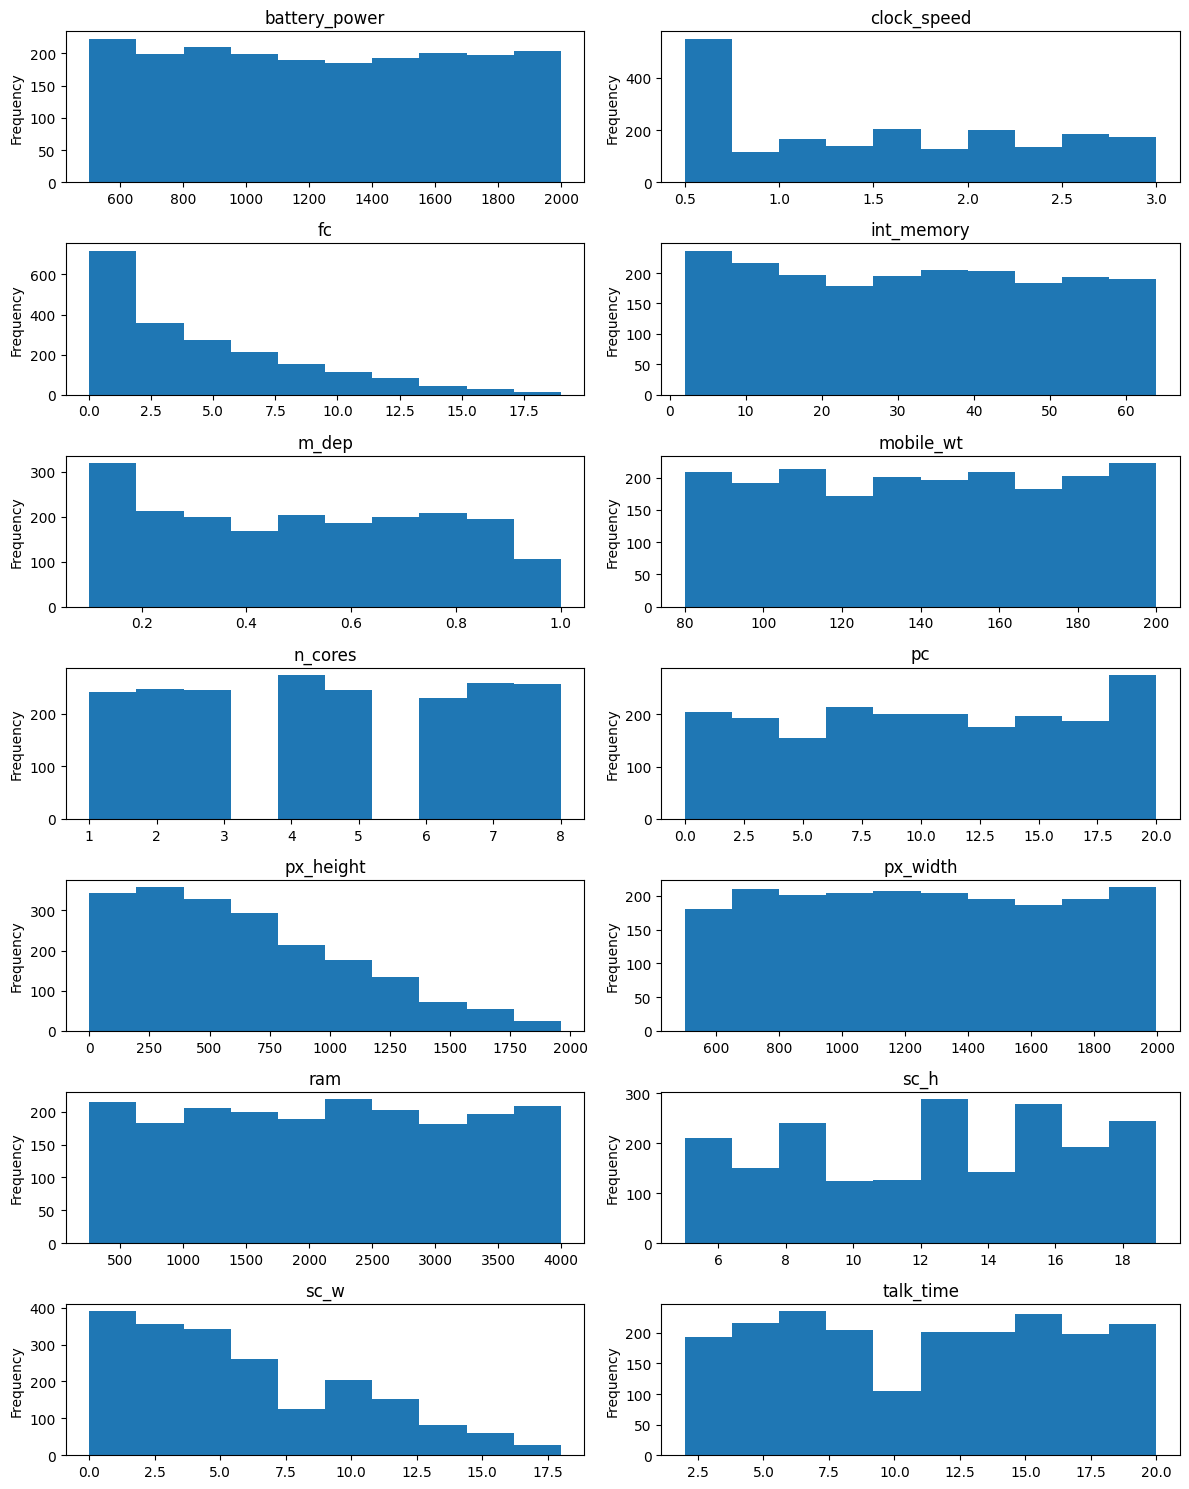

In [52]:
# plot float features
fig, axes = plt.subplots(7, 2, figsize=(12, 15))
for i, feature in enumerate(feats_float):
    row = i//2
    col = i%2

    ax = axes[row, col]
    df[feature].plot(kind="hist", ax=ax)
    ax.set_title(feature)
plt.tight_layout()

## features vs target analysis

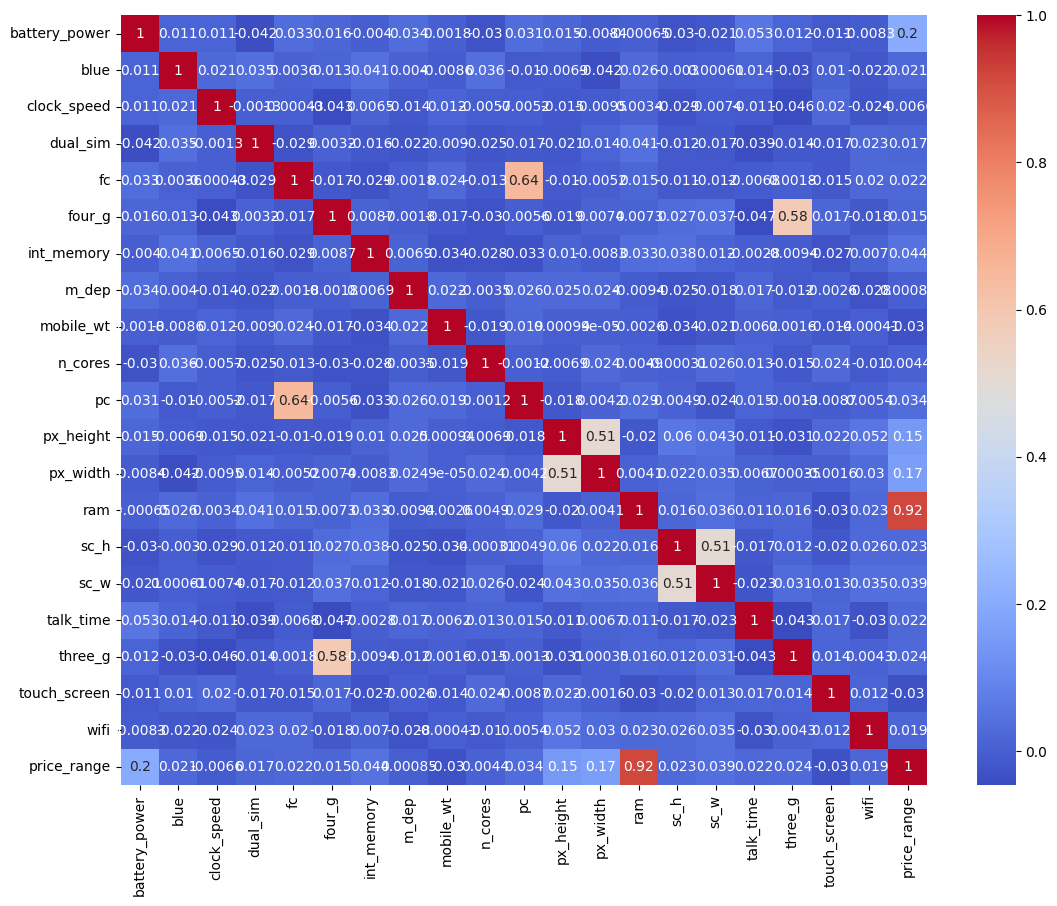

In [55]:
# correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

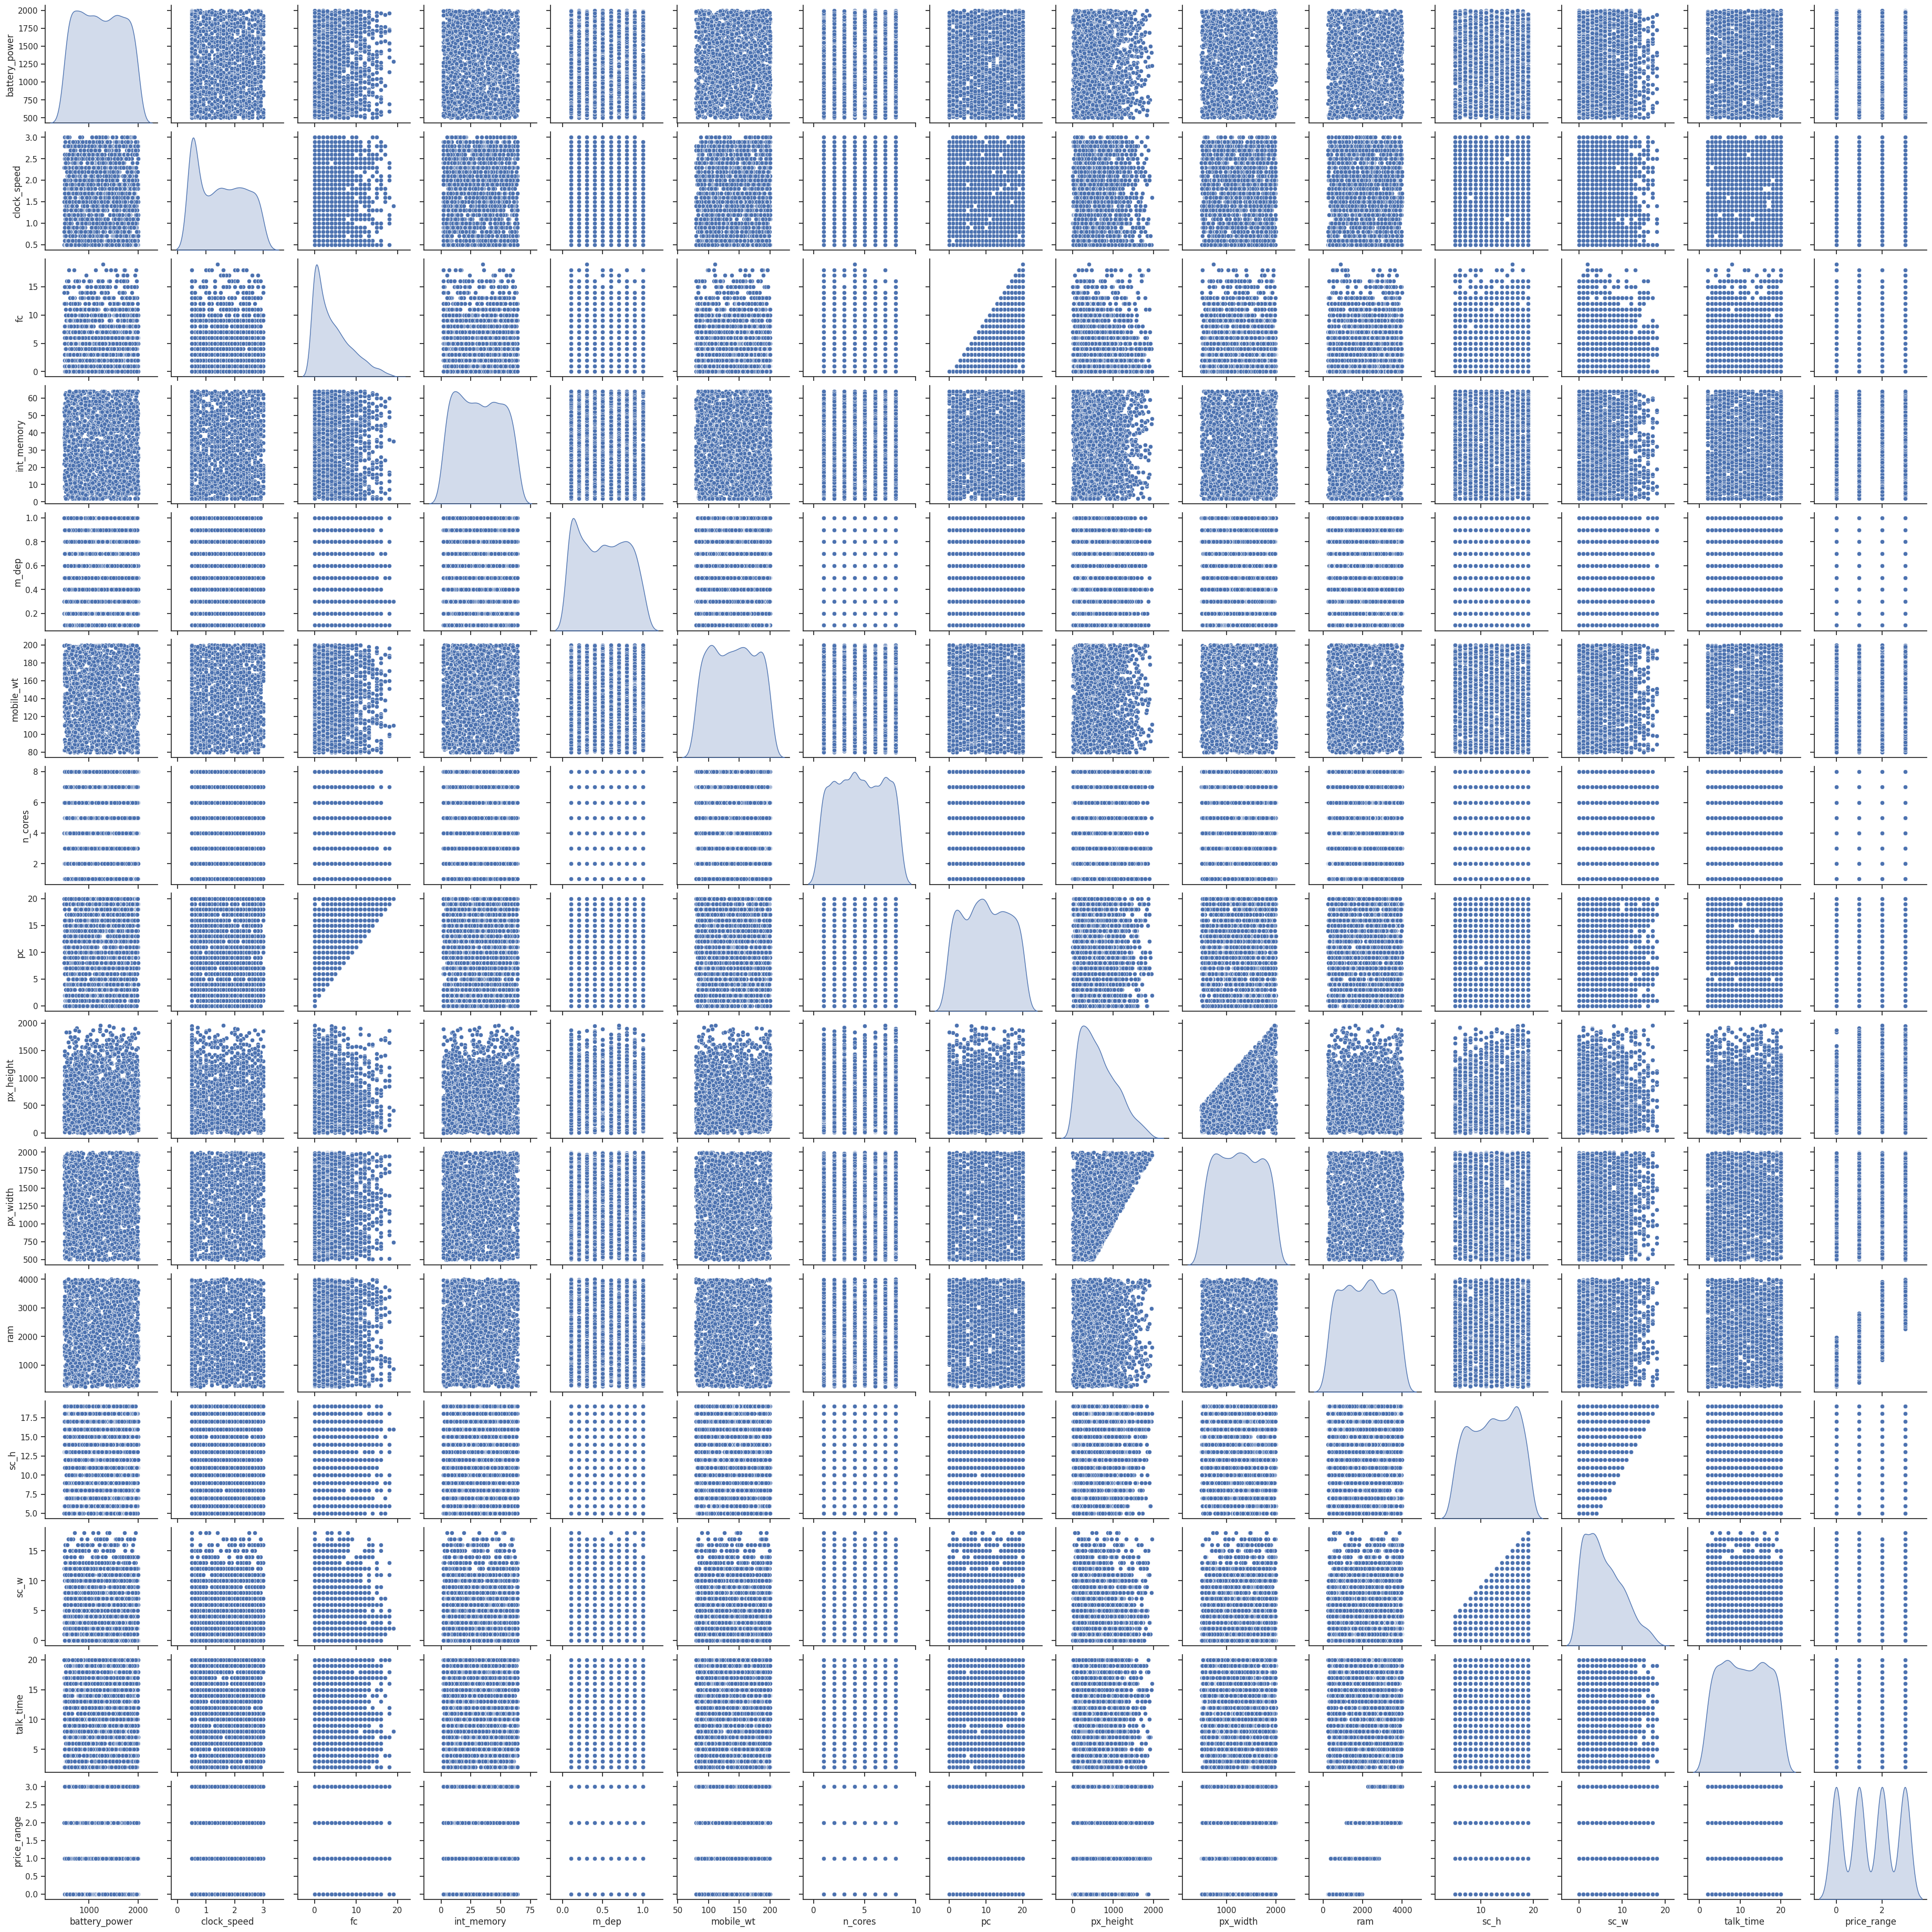

In [59]:
# pairplot
sns.set(style="ticks")
sns.pairplot(df[feats_float + [TARGET]], diag_kind="kde")